In [1]:
#In this project we use natural langauge processing for text classification
#We are using the data from the following source http://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [3]:
df=pd.read_csv("moviereviews.csv")

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [5]:
#we will try to predict wheather review is negative or positive based on review text

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
#We will drop rows wih missing reviews
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [9]:
#now let's check if we have reviews with empty text
def isnotblank(x):
    return bool(str.strip(x))

In [10]:
df["review"].apply(isnotblank)

0       True
1       True
2       True
3       True
4       True
        ... 
1995    True
1996    True
1997    True
1998    True
1999    True
Name: review, Length: 1965, dtype: bool

In [11]:
df[df["review"].apply(isnotblank)]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [12]:
#removing (1965-1938) rows with empty reviews
df=df[df["review"].apply(isnotblank)]

In [13]:
len(df)

1938

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [39]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


<Axes: xlabel='label', ylabel='count'>

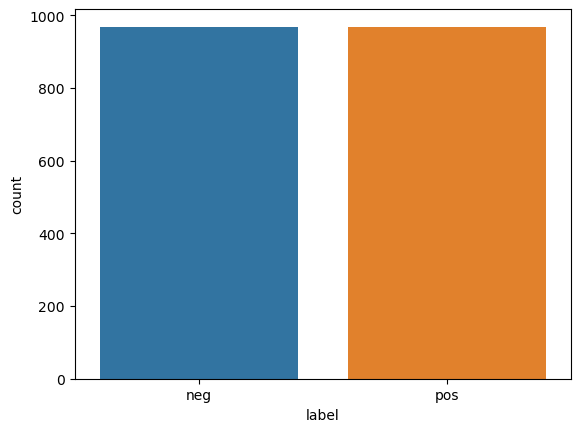

In [42]:
#We can see that our classes are balanced
sns.countplot(data=df,x="label")

# Model for prediction

In [16]:
X=df["review"]
y=df["label"]

In [17]:
X

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
4       my first press screening of 1998 and already i...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 1938, dtype: object

In [18]:
y


0       neg
1       neg
2       pos
3       pos
4       neg
       ... 
1995    pos
1996    pos
1997    pos
1998    pos
1999    pos
Name: label, Length: 1938, dtype: object

In [19]:
# we first separate data ino training and test sampples


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
X_test.shape

(388,)

In [22]:
X_train.shape

(1550,)

In [23]:
#transform test data to prepare for model
vec=TfidfVectorizer()
vec.fit(X_train)

TfidfVectorizer()

In [24]:
X_train_tfidf=vec.transform(X_train)

In [26]:
X_test_tfidf=vec.transform(X_test)

In [28]:
def label_classify(model,param_grid,X_train_tfidf,y_train, X_test_tfidf,y_test):

    grid=GridSearchCV(model,param_grid)
    grid.fit(X_train_tfidf,y_train)
    y_pred=grid.predict(X_test_tfidf)

    print(grid.best_params_)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
#We first use LogisticRegression 

{'max_iter': 100}
              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



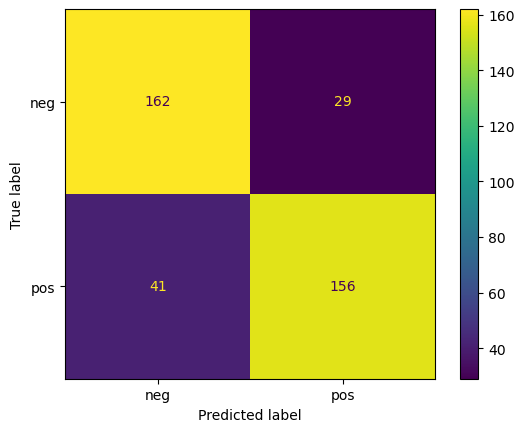

In [30]:
model=LogisticRegression()
param_grid={"max_iter":[100,500,1000, 2000]}
label_classify(model,param_grid,X_train_tfidf,y_train,X_test_tfidf,y_test)

{'alpha': 0.8}
              precision    recall  f1-score   support

         neg       0.75      0.92      0.82       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.80       388
weighted avg       0.82      0.81      0.80       388



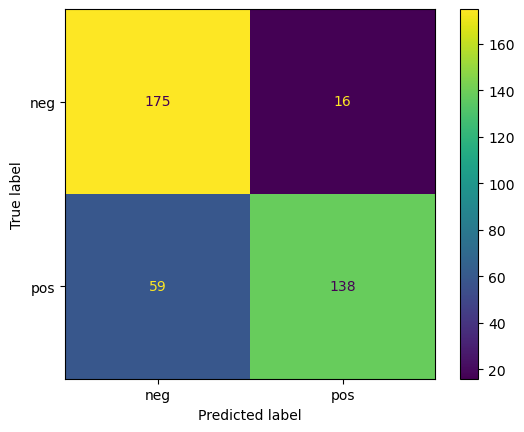

In [32]:
nb=MultinomialNB()
param_grid={"alpha":[1,0.8]}
label_classify(nb,param_grid,X_train_tfidf,y_train,X_test_tfidf,y_test)

In [33]:
#Both models provide good classification